In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_parquet("train.parquet", engine="pyarrow")

In [3]:
target_df = train_df[train_df['Incident'] == 'TARGET DRUG']
target_df['Month'] = target_df['Date'].dt.month

In [4]:
df_pivot = pd.pivot_table(target_df, values='Incident', index='Patient-Uid', columns='Month', aggfunc='count', fill_value=0)
X = df_pivot.to_numpy()

In [5]:
df_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0)

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_norm)

KMeans(n_clusters=4)

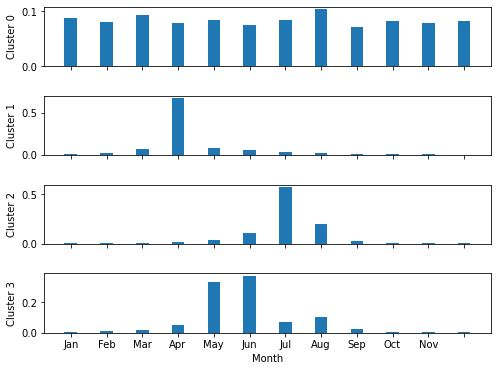

In [7]:
cluster_centers = kmeans.cluster_centers_
# Create bar plot
import calendar
fig, ax = plt.subplots(kmeans.n_clusters, 1, figsize=(8, 6), sharex=True)
x = np.arange(len(cluster_centers[0]))
width = 0.35
for i, cluster in enumerate(cluster_centers):
    ax[i].bar(x, cluster, width)
    ax[i].set_ylabel(f'Cluster {i}')
ax[-1].set_xlabel('Month')

month_labels = [calendar.month_name[(i + 1) % 12][:3] for i in range(len(x))]
ax[-1].set_xticks(x)
ax[-1].set_xticklabels(month_labels)

# Add some space for y-ticks
plt.subplots_adjust(hspace=0.5)
plt.show()



In [8]:
series_list = []

# Iterate through the range of columns
for i in range(0, len(df_pivot.columns) - 1):
    # Calculate the average of two sequential columns
    a = (df_pivot.iloc[:, i] + df_pivot.iloc[:, i + 1]) / 2

    series_list.append(a)

# Combine the series into a single DataFrame
combined_df = pd.concat(series_list, axis=1)
combined_df

0    1    2    3    4    5    6    7   \
Patient-Uid                                                                    
a0e9c384-1c7c-11ec-81a0-16262ee38c7f  0.0  0.0  0.0  0.0  0.0  0.5  1.0  1.0   
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f  0.5  0.5  0.5  1.0  1.5  1.5  2.0  1.5   
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f  0.5  0.5  0.0  0.5  0.5  0.0  0.0  0.0   
a0e9c414-1c7c-11ec-889a-16262ee38c7f  0.5  0.5  1.0  1.5  1.0  1.0  1.5  1.5   
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5   
...                                   ...  ...  ...  ...  ...  ...  ...  ...   
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f  0.0  0.0  0.0  0.0  0.5  0.5  0.5  0.5   
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f  0.0  0.0  0.0  0.0  0.0  0.5  0.5  0.0   
a0f0d523-1c7c-11ec-89d2-16262ee38c7f  0.0  0.0  0.0  0.5  1.0  0.5  0.5  0.5   
a0f0d553-1c7c-11ec-a70a-16262ee38c7f  0.0  0.0  0.0  0.0  0.0  0.5  0.5  0.0   
a0f0d582-1c7c-11ec-a6c1-16262ee38c7f  0.0  0.0  0.0  0.0  0.5  1.0  1.0  0.5   

                                       8    9    10  
Patient-Uid                                          
a0e9c384-1c7c-11ec-81a0-16262ee38c7f  0.5  0.0  0.0  
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f  0.5  0.5  0.5  
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f  0.5  0.5  0.5  
a0e9c414-1c7c-11ec-889a-16262ee38c7f  0.5  0.5  1.5  
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f  1.5  1.0  0.5  
...                                   ...  ...  ...  
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f  0.0  0.0  0.0  
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f  0.0  0.0  0.0  
a0f0d523-1c7c-11ec-89d2-16262ee38c7f  0.0  0.0  0.0  
a0f0d553-1c7c-11ec-a70a-16262ee38c7f  0.0  0.0  0.0  
a0f0d582-1c7c-11ec-a6c1-16262ee38c7f  0.0  0.0  0.0  

[9374 rows x 11 columns]

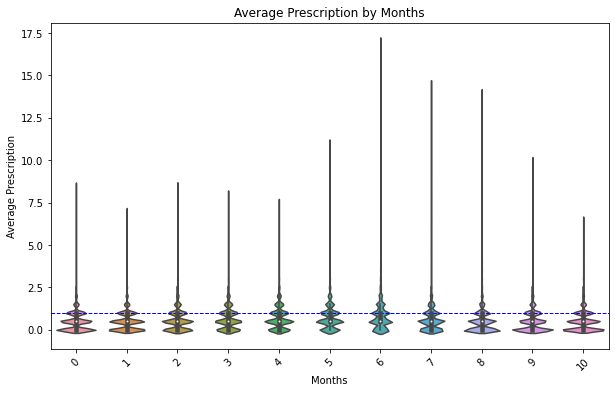

In [9]:
import seaborn as sns
# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.set_palette("Set2")
plt.axhline(y=1, color='blue', linestyle='--', linewidth=1)
plt.xlabel("Months")
plt.ylabel("Average Prescription")
sns.violinplot(data=combined_df)

# Customize the plot
plt.title('Average Prescription by Months')
plt.xticks(rotation=45)

plt.show()